In [1]:
#type:ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Necessary to enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,f1_score

In [2]:
df=pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
removable_columns=[]
for col in df.columns:
    if (df[col].isnull().sum()/len(df[col]))>=0.4:
        removable_columns.append(col)

In [6]:
df.drop(removable_columns,axis='columns',inplace=True)

In [7]:
df.shape

(1460, 75)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

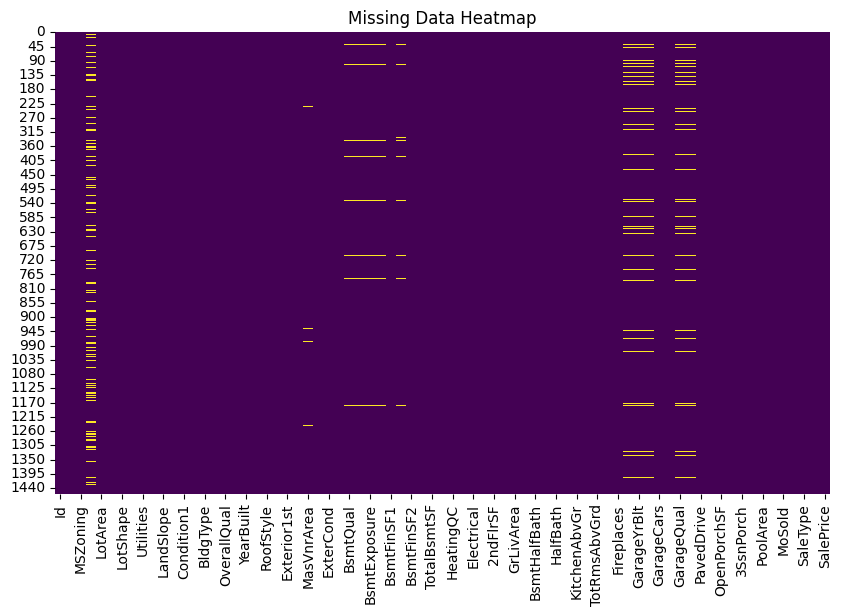

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**IMPUTED NUMERICAL COLMUNS**

In [10]:
numerical_col=df.select_dtypes(include=['float64', 'int64']).columns


In [11]:
from sklearn.impute import KNNImputer


# mean_imputer=SimpleImputer(strategy='mean')
# df_mean_imputed=pd.DataFrame(mean_imputer.fit_transform(df[numerical_col]),columns=numerical_col)


# # Median imputation
# median_imputer = SimpleImputer(strategy='median')
# df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df2[numerical_col]),columns=numerical_col)

# # KNN Imputation
# knn_imputer = KNNImputer(n_neighbors=10)
# df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[numerical_col]),columns=numerical_col)

# Iterative Imputation
# iter_imputer = IterativeImputer()
# df_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(df[numerical_col]), columns=numerical_col)

df_interpolated=df[numerical_col].interpolate(method='polynomial',order=2,direction='forward')

In [12]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

**IMPUTED CATEGORICAL COLUMNS**

In [13]:
categorical_col=df.select_dtypes(include='object').columns


In [14]:
# df_cat1=df.copy(deep=True)
mode_imputer=SimpleImputer(strategy='most_frequent')
df_cat_mode_imputed=pd.DataFrame(mode_imputer.fit_transform(df[categorical_col]),columns=categorical_col)



In [15]:
# df_cat_imputed_encoded=pd.get_dummies(df_cat_mode_imputed,columns=categorical_col)

In [16]:
# df_cat_imputed_encoded.shape

In [17]:
# df_interpolated.reset_index(drop=True)
# df_cat_mode_imputed.reset_index(drop=True)

In [18]:
df_without_nullvalues=pd.concat([df_interpolated,df_cat_mode_imputed],axis=1)

In [19]:
df_without_nullvalues.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

## EDA And Feature Engineering

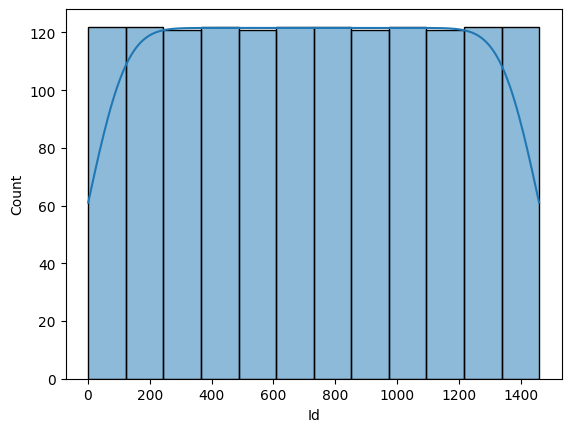

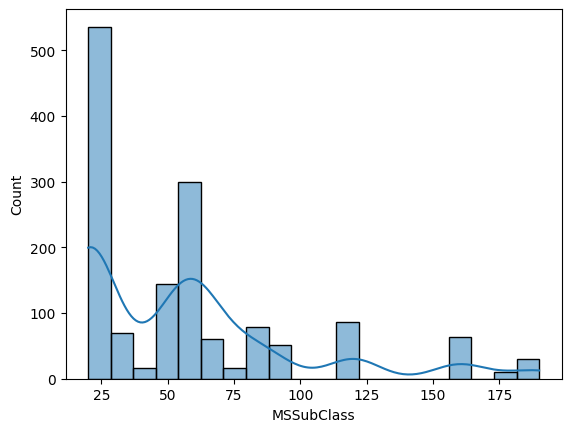

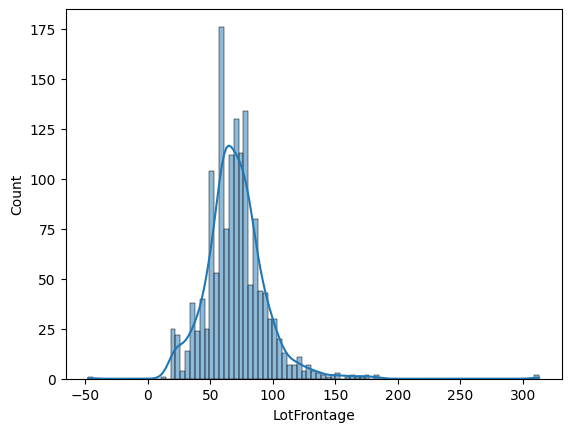

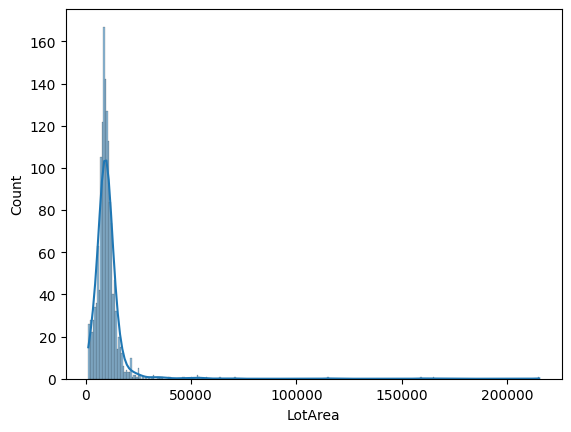

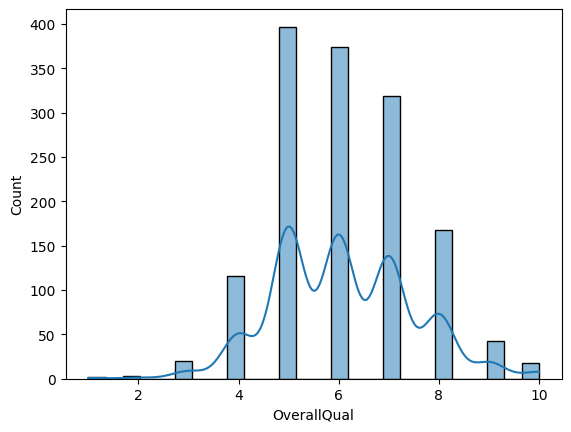

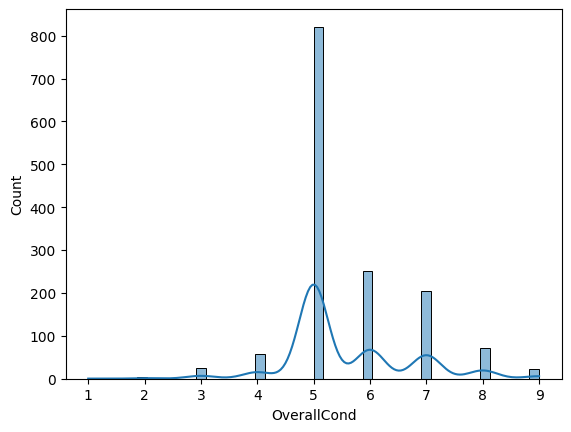

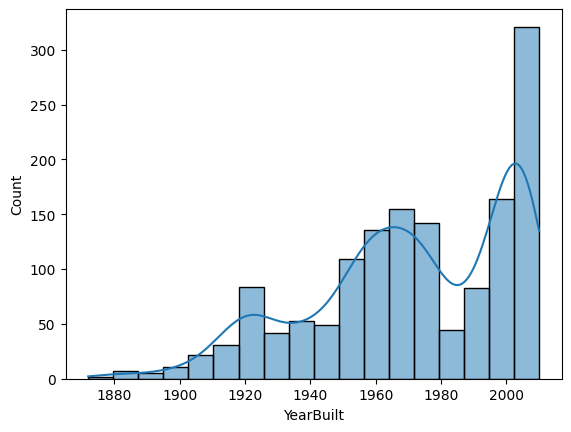

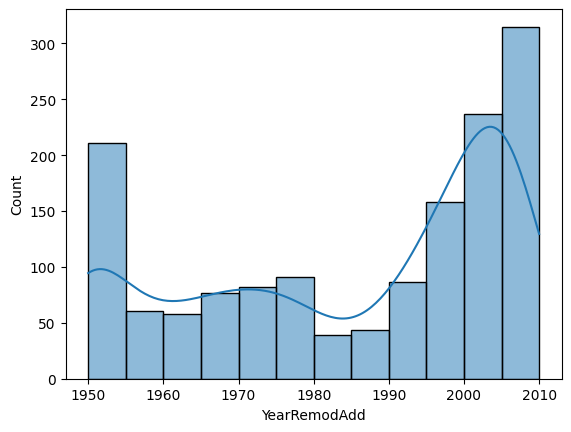

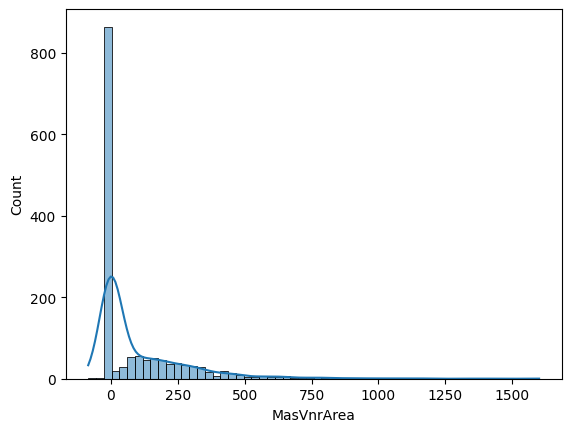

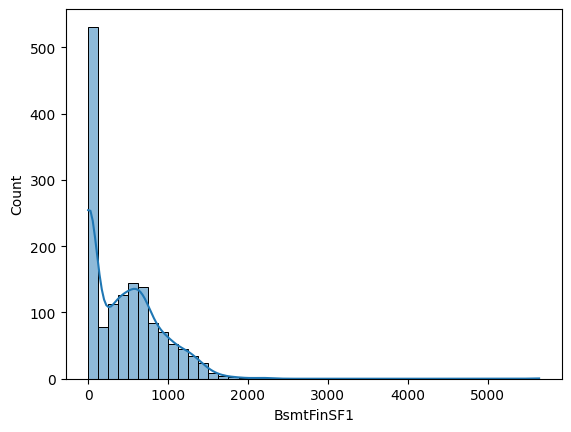

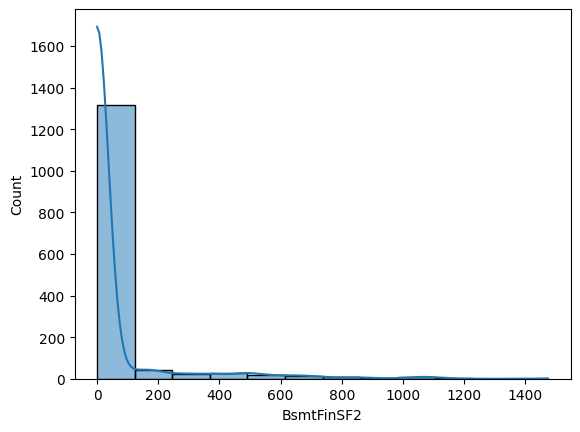

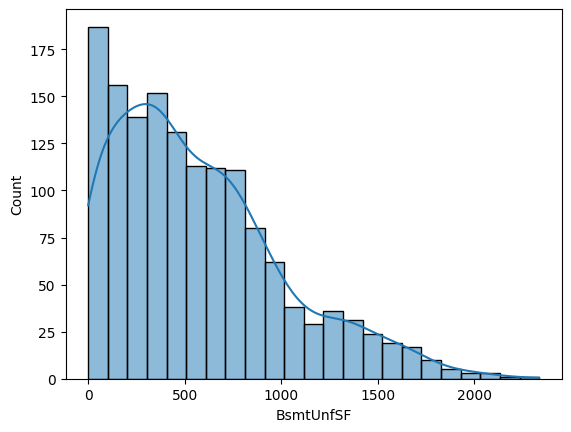

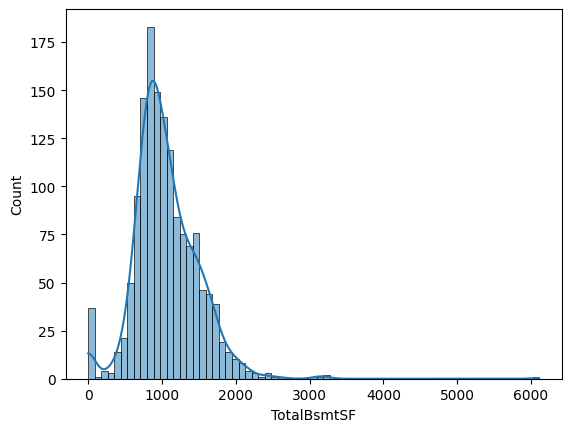

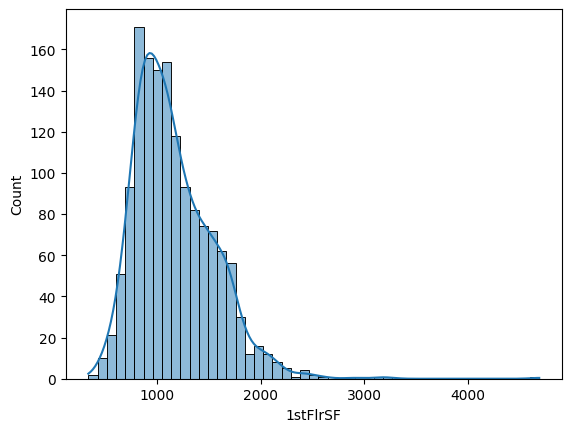

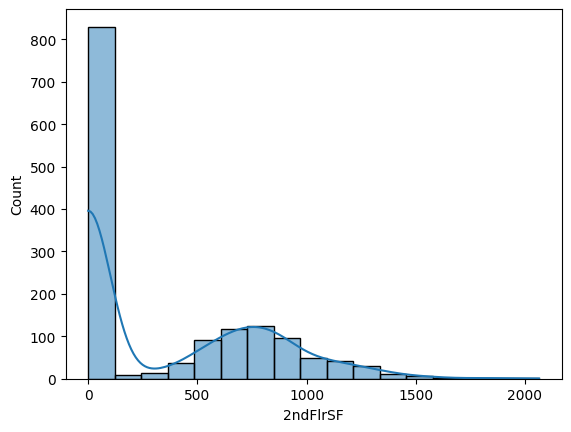

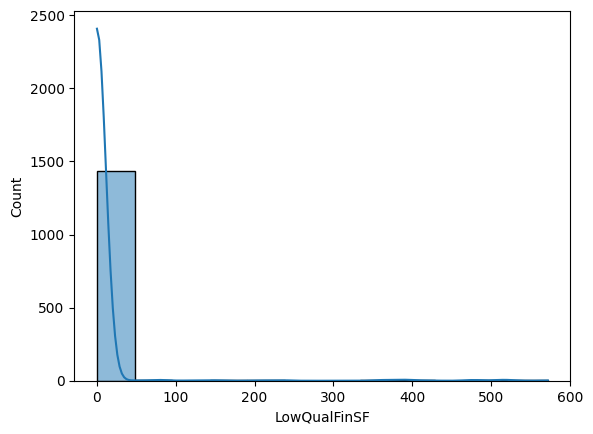

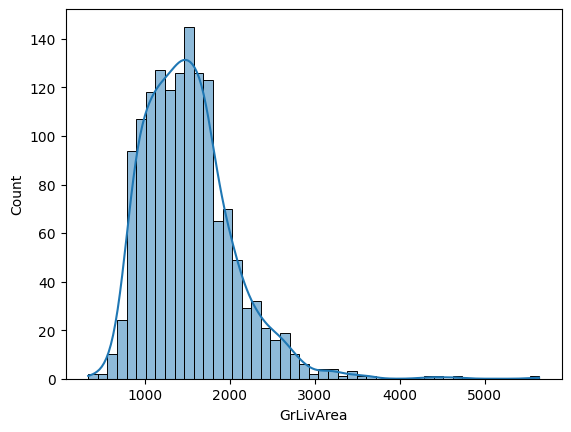

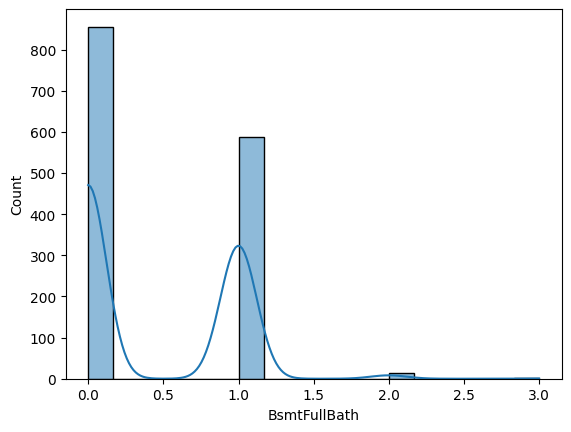

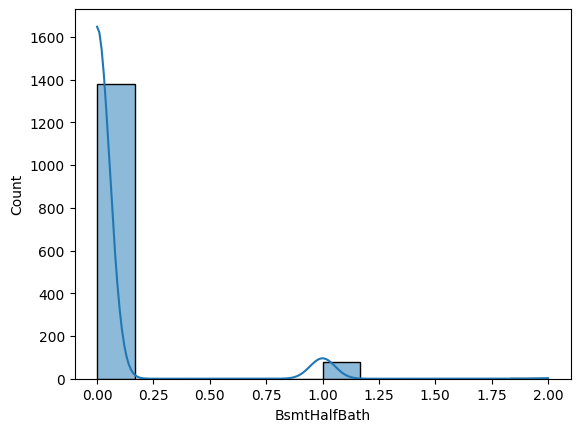

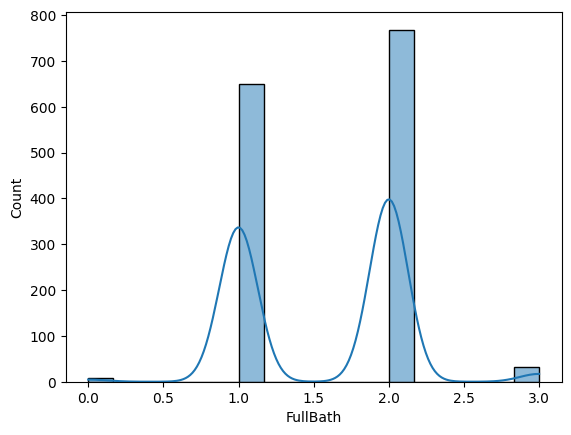

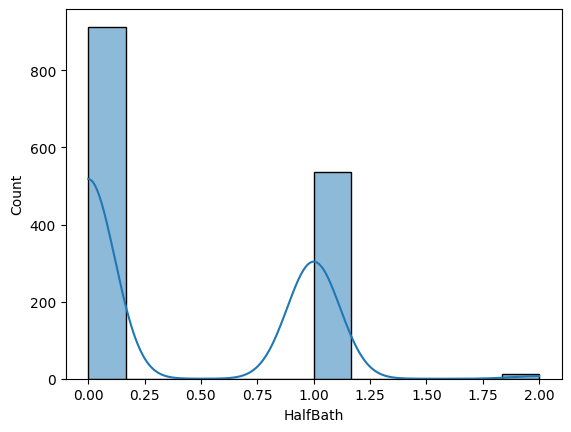

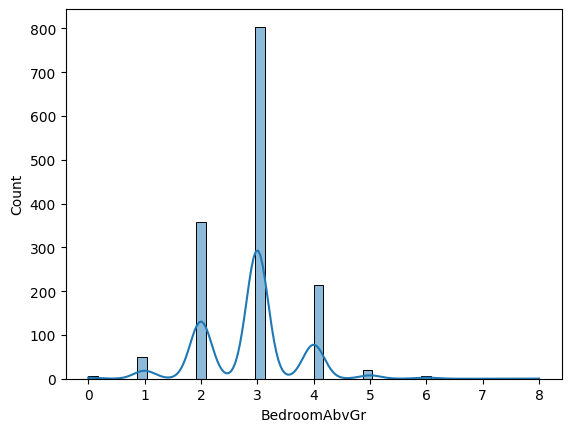

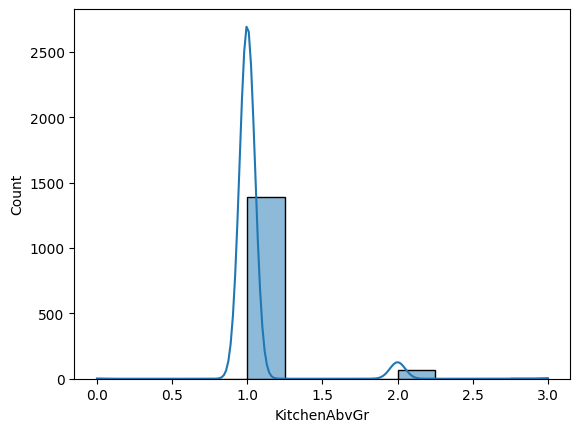

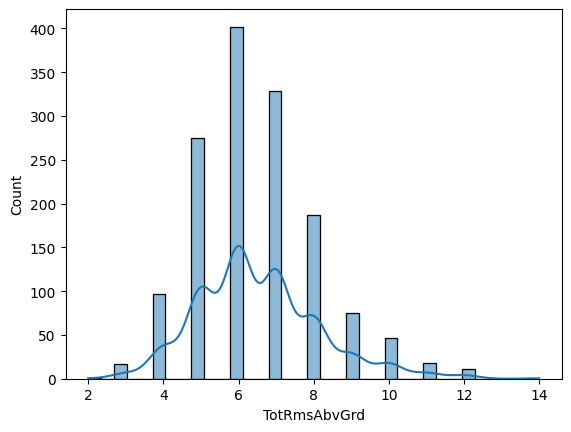

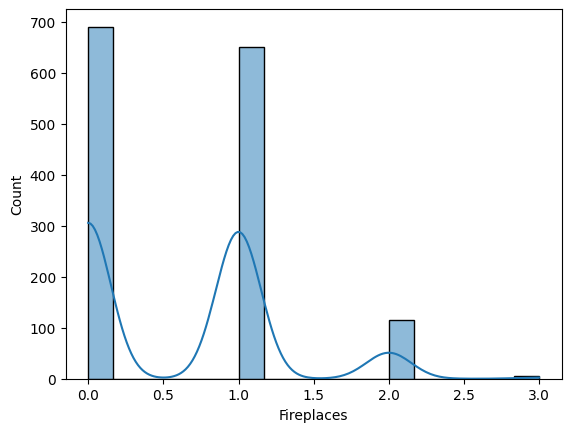

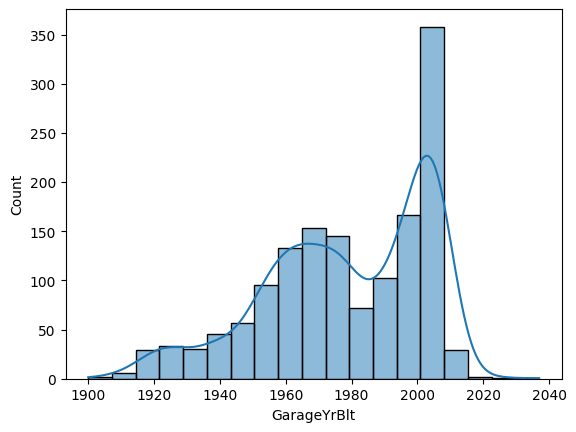

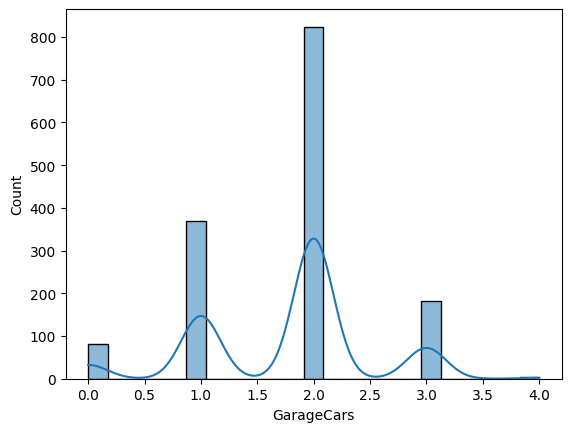

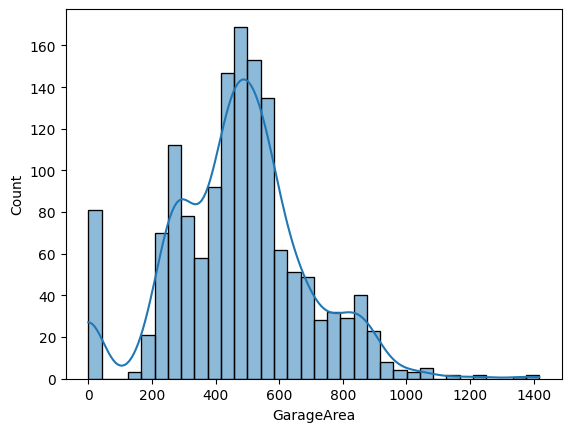

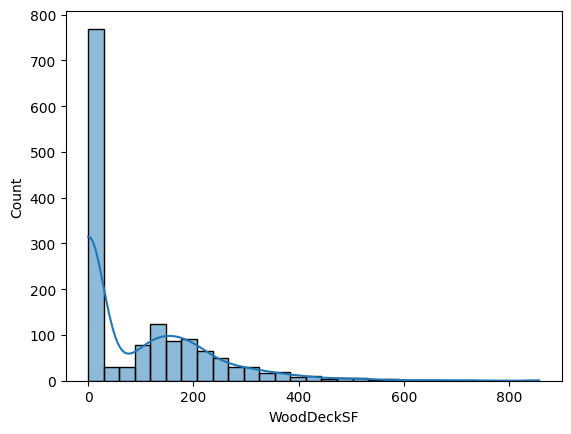

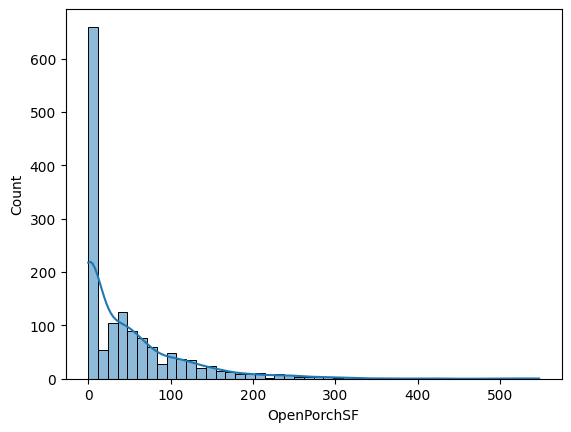

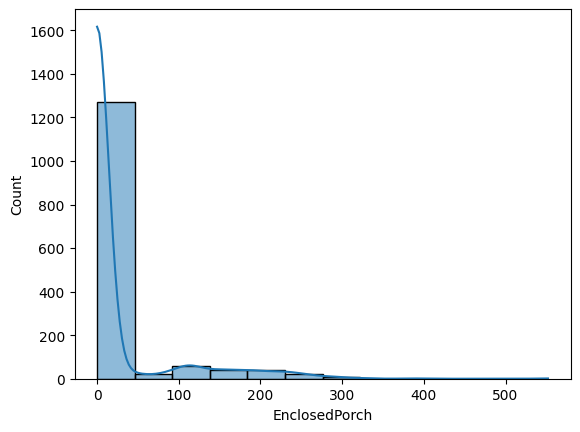

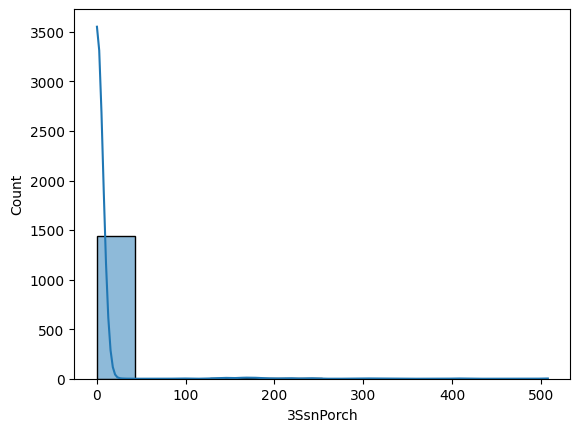

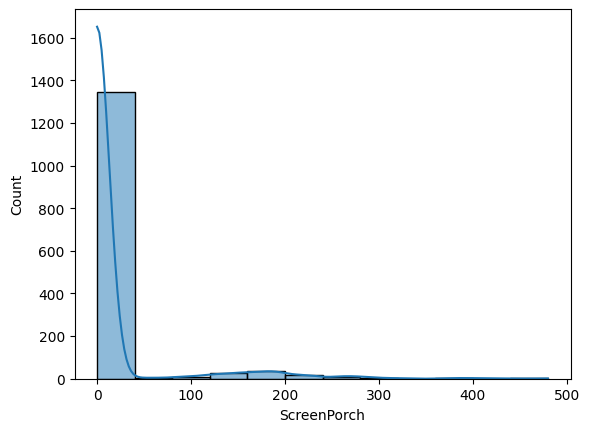

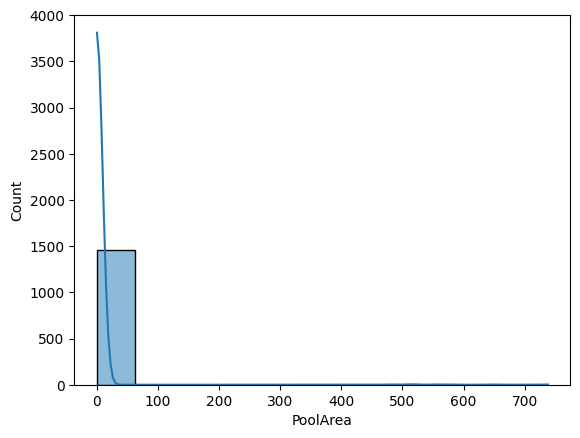

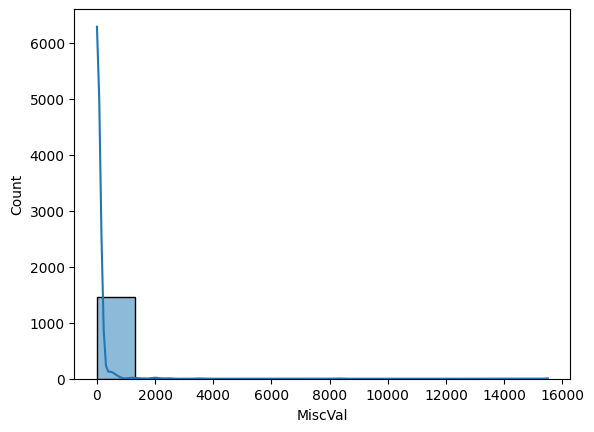

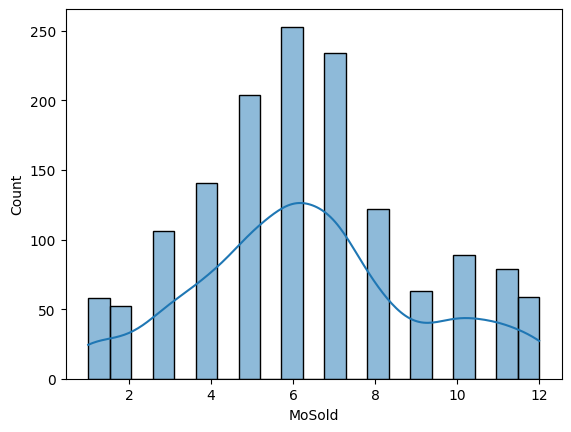

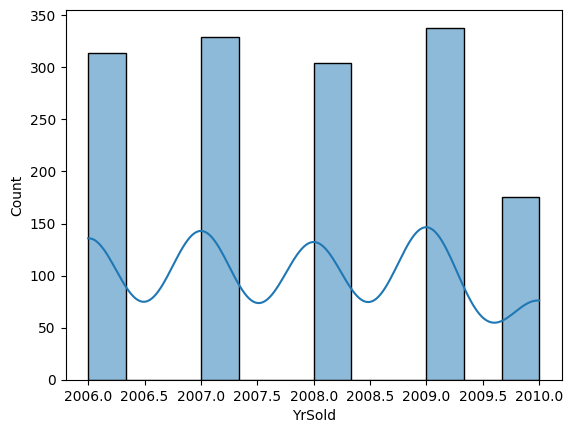

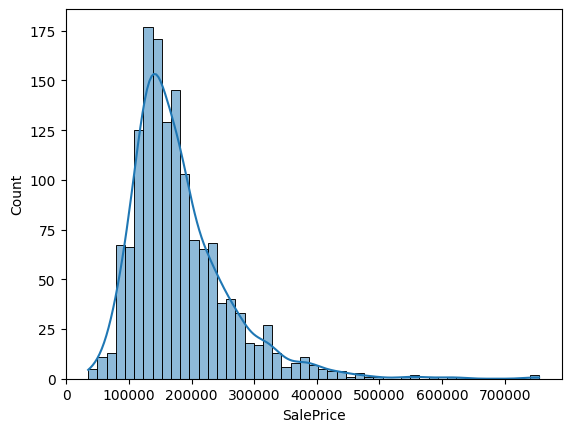

In [20]:
for col in df_without_nullvalues[numerical_col].columns:
    sns.histplot(x=col,data=df_without_nullvalues,kde=True)
    plt.show()

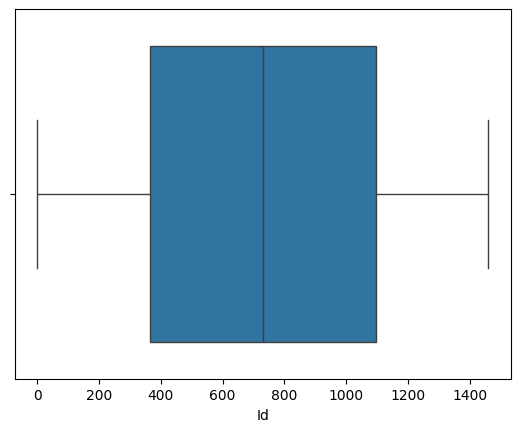

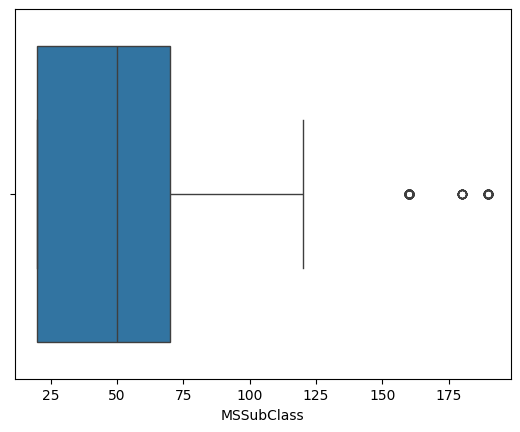

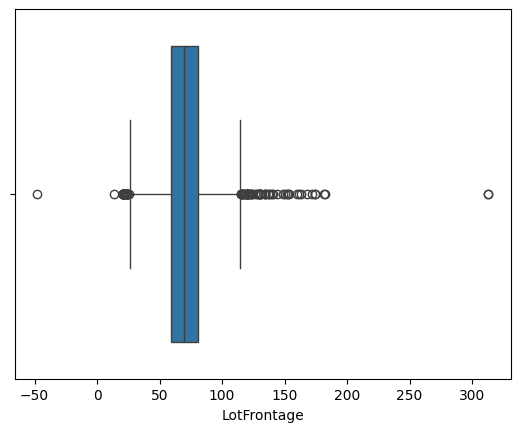

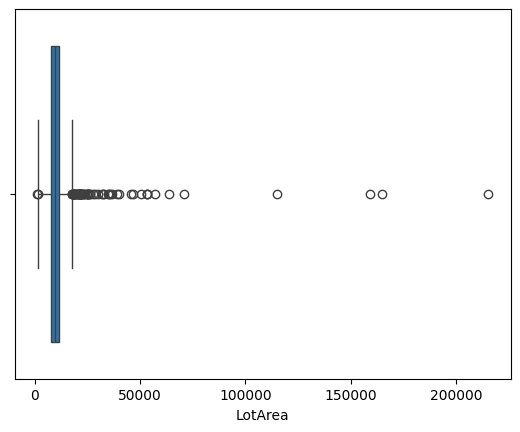

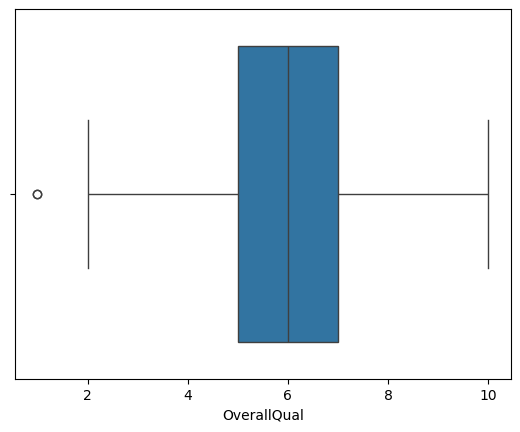

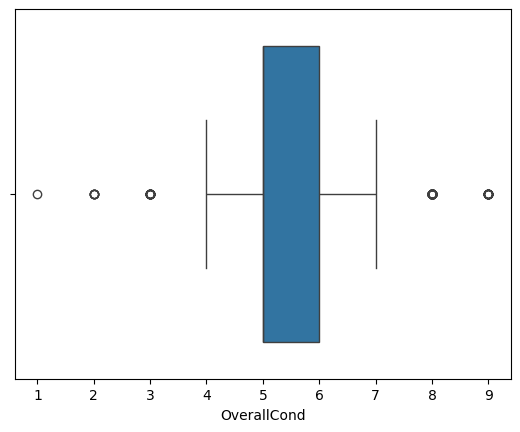

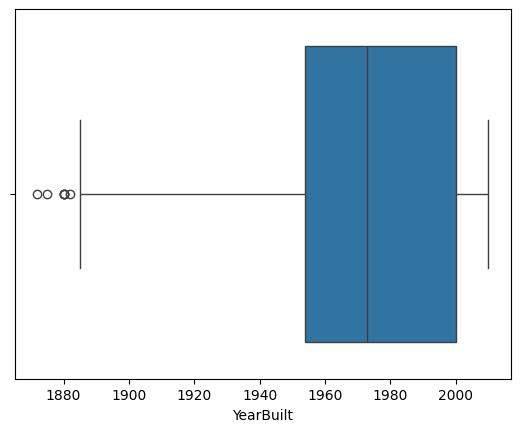

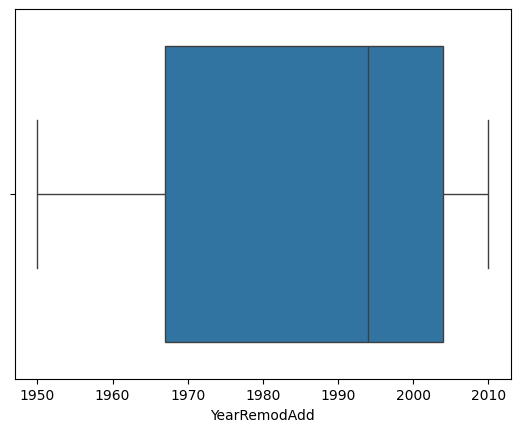

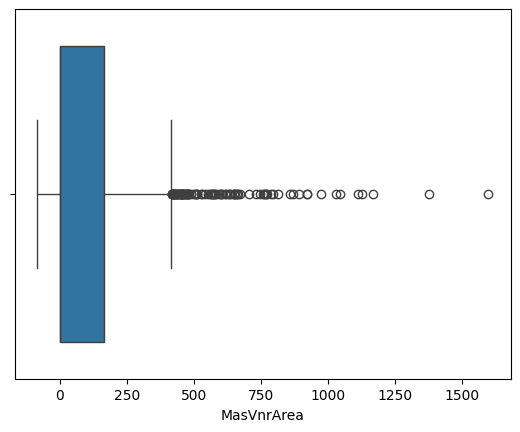

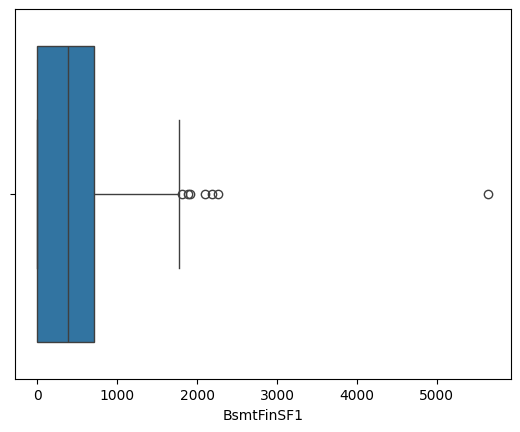

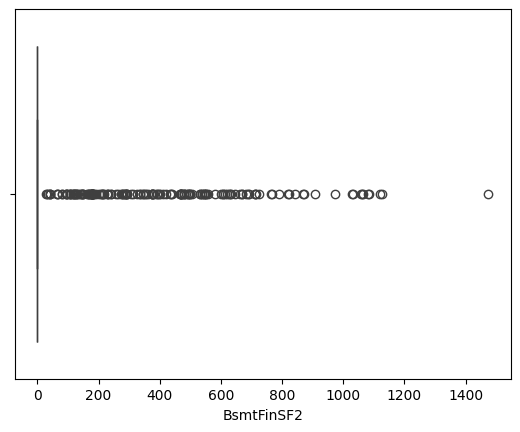

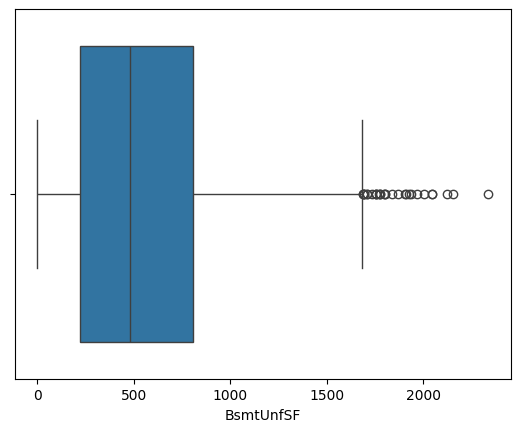

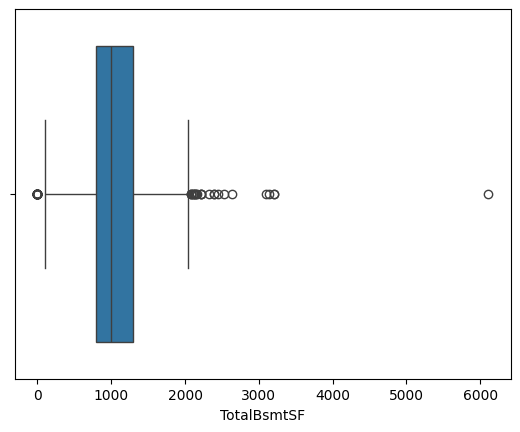

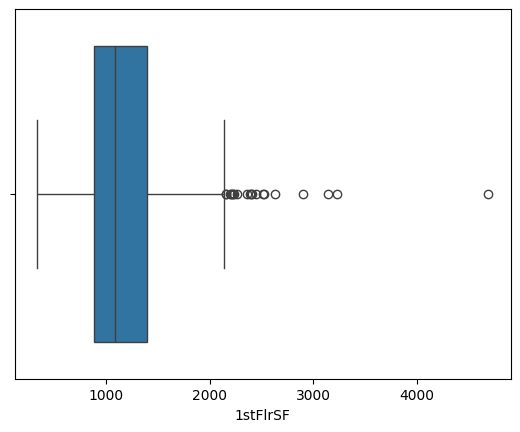

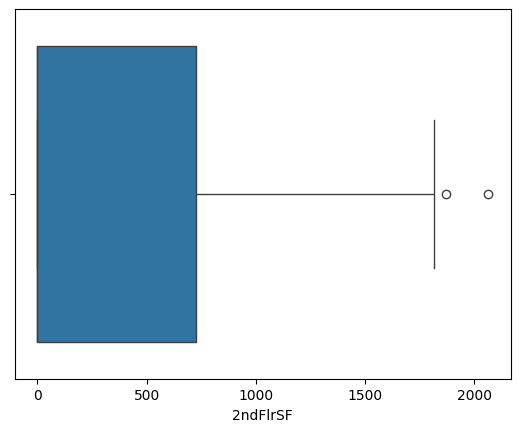

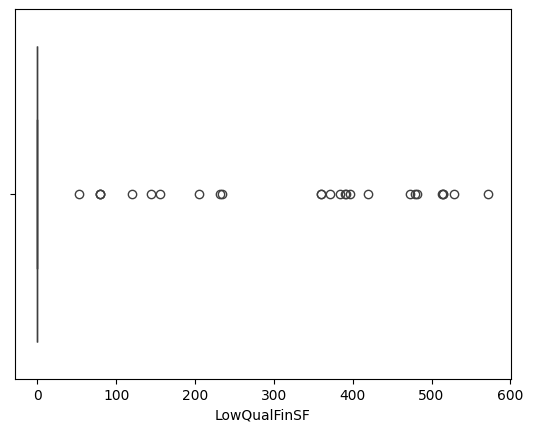

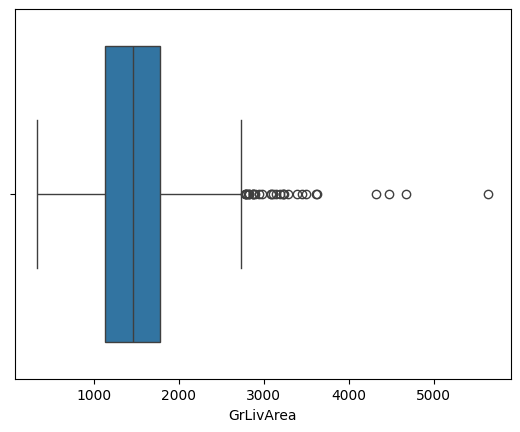

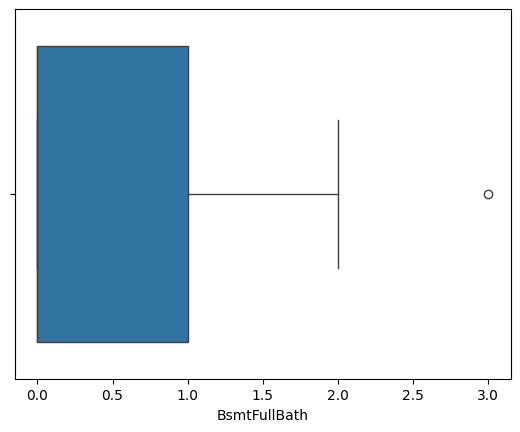

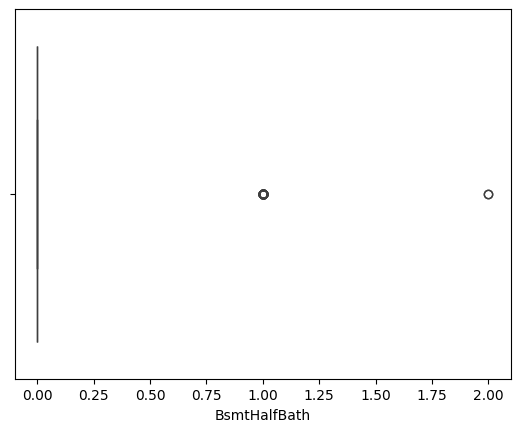

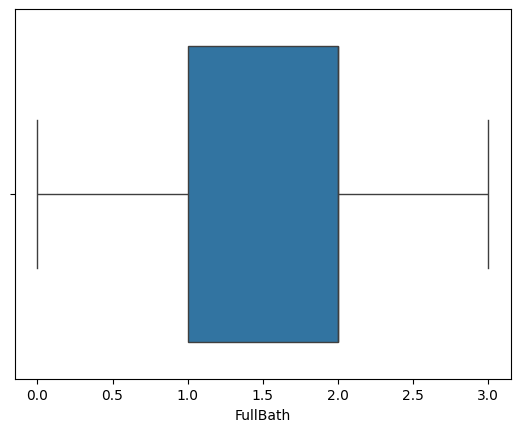

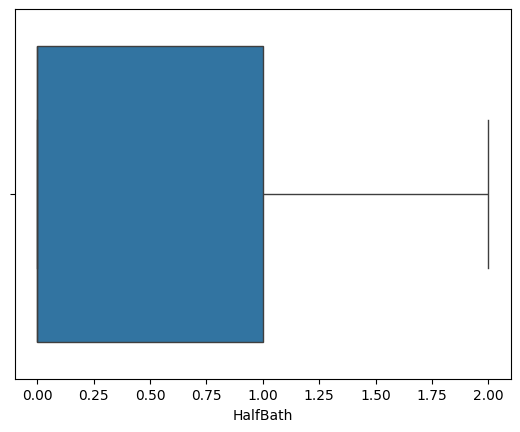

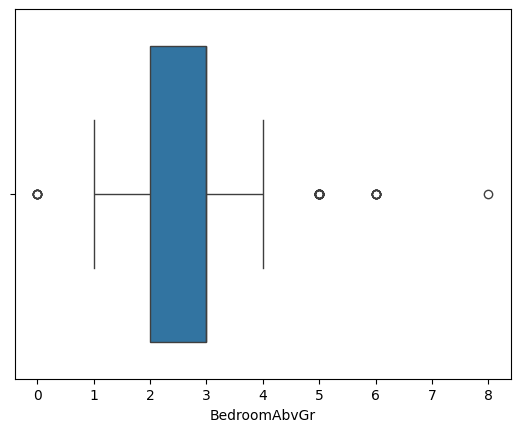

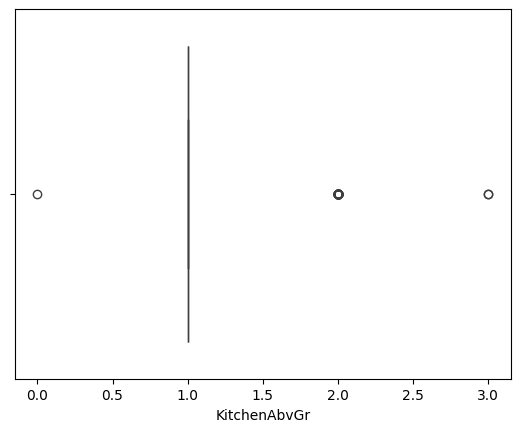

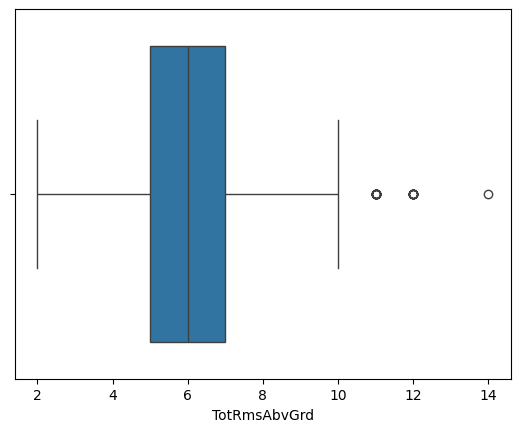

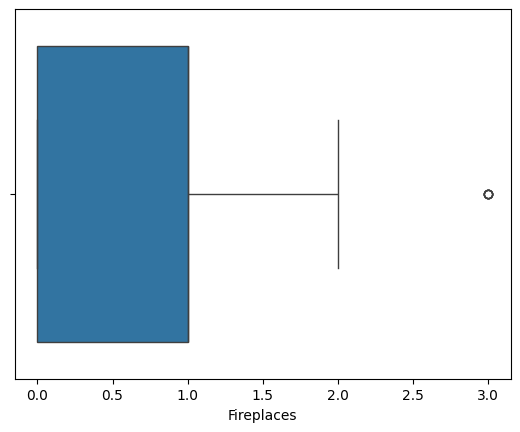

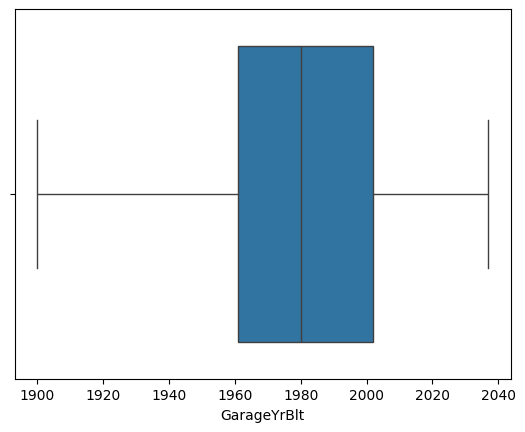

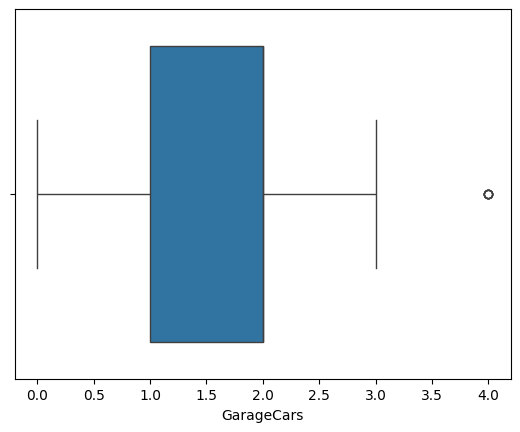

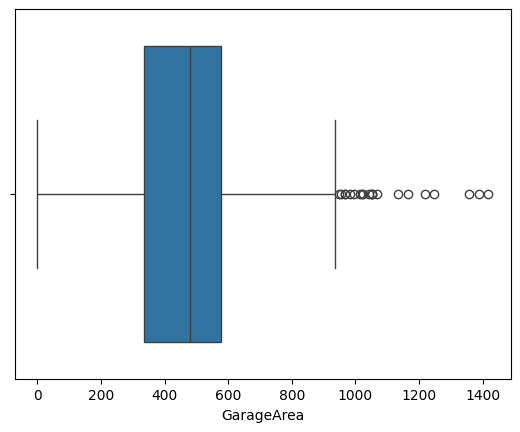

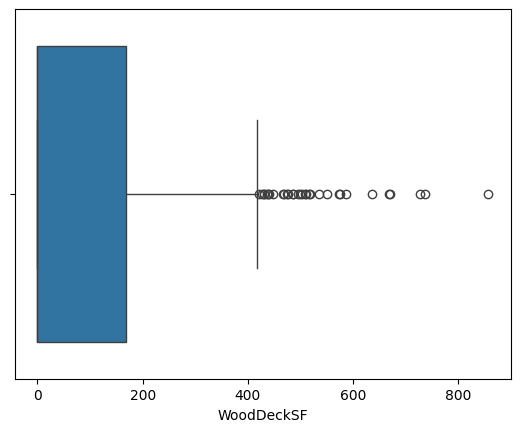

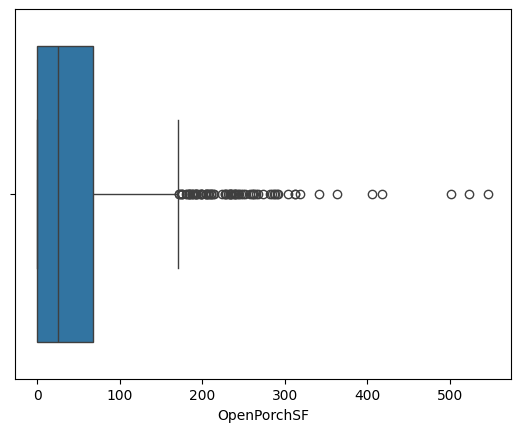

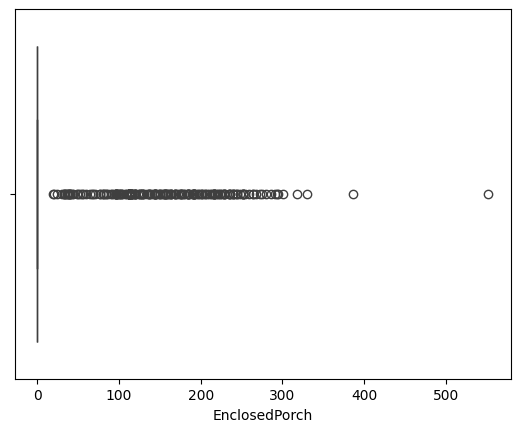

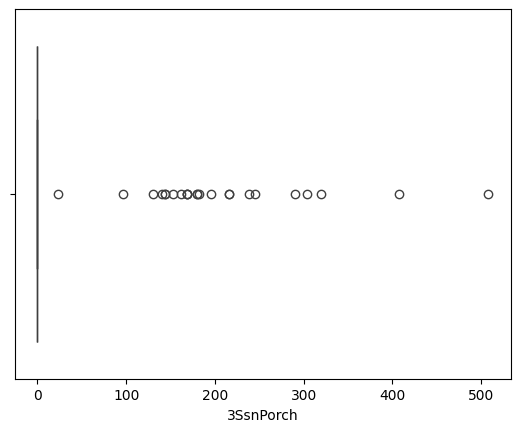

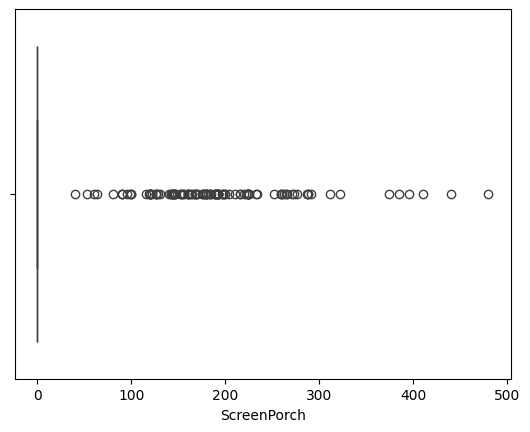

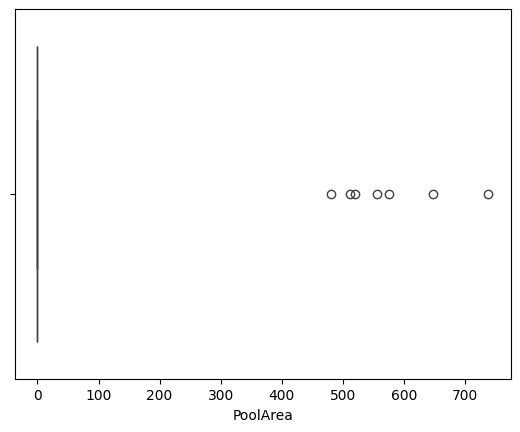

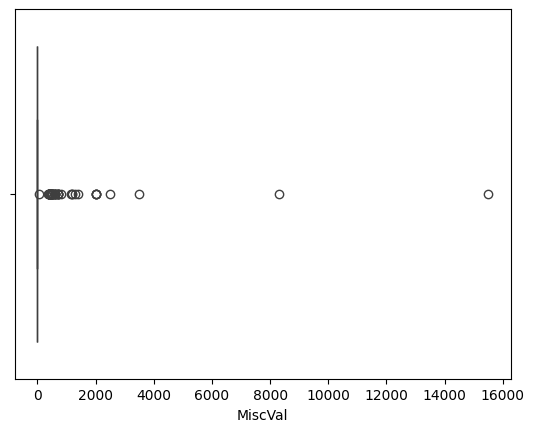

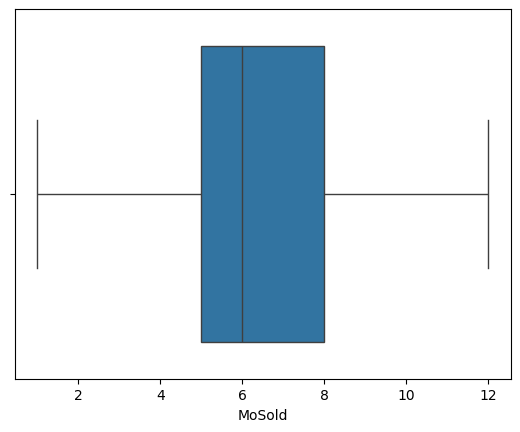

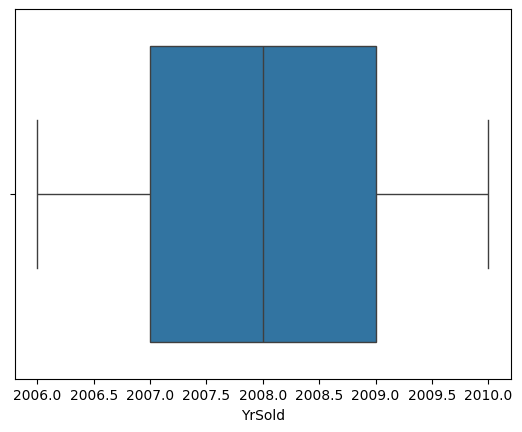

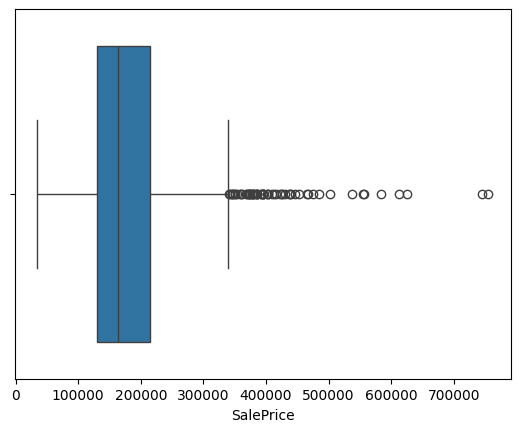

In [21]:
for col in df_without_nullvalues[numerical_col].columns:
    sns.boxplot(x=col,data=df_without_nullvalues)
    plt.show()

In [22]:
for col in df_without_nullvalues[numerical_col].columns:
    Q1 = df_without_nullvalues[col].quantile(0.25)
    Q3 = df_without_nullvalues[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers based on IQR
    df_no_outliers = df_without_nullvalues[(df_without_nullvalues[col]>=lower_bound )& (df_without_nullvalues[col]<=upper_bound)]

In [23]:
columns_to_be_normalized=[]
for col in df_without_nullvalues[numerical_col].columns:
    skewness_value = df_no_outliers[col].skew()
    
    if skewness_value == 0:
        print(f"Normally distributed {col} -------> {skewness_value}")
    
    elif -0.5 < skewness_value < 0.5:
        print(f"Mild Skewness {col} -------> {skewness_value}")
    
    elif 0.5 <= skewness_value < 1:
        columns_to_be_normalized.append(col)
        print(f"Moderate Skewness (Positive) {col} -------> {skewness_value}")
    
    elif skewness_value >= 1:
        columns_to_be_normalized.append(col)

        print(f"High Skewness (Positive) {col} -------> {skewness_value}")
    
    elif -1 <= skewness_value < -0.5:
        columns_to_be_normalized.append(col)

        print(f"Moderate Skewness (Negative) {col} -------> {skewness_value}")
    
    elif skewness_value < -1:
        columns_to_be_normalized.append(col)
        print(f"High Skewness (Negative) {col} -------> {skewness_value}")


Mild Skewness Id -------> -0.01445195132551283
High Skewness (Positive) MSSubClass -------> 1.3850728982386322
High Skewness (Positive) LotFrontage -------> 1.8961969411376993
High Skewness (Positive) LotArea -------> 11.172705294533639
Mild Skewness OverallQual -------> 0.05109204921298615
Moderate Skewness (Positive) OverallCond -------> 0.6546327271629171
Moderate Skewness (Negative) YearBuilt -------> -0.5731429700644672
Mild Skewness YearRemodAdd -------> -0.44790685019543064
High Skewness (Positive) MasVnrArea -------> 2.7615512681483176
High Skewness (Positive) BsmtFinSF1 -------> 1.8744973013829664
High Skewness (Positive) BsmtFinSF2 -------> 4.21969459792093
Moderate Skewness (Positive) BsmtUnfSF -------> 0.815368896418734
High Skewness (Positive) TotalBsmtSF -------> 1.627363550771739
High Skewness (Positive) 1stFlrSF -------> 1.4372263844250401
Moderate Skewness (Positive) 2ndFlrSF -------> 0.7493275699272454
High Skewness (Positive) LowQualFinSF -------> 9.002291981073975
H

In [24]:
from sklearn.preprocessing import PowerTransformer
for col in columns_to_be_normalized:
    pt = PowerTransformer(method='yeo-johnson')
    df['col'] = pt.fit_transform(df[[col]])

c:\Users\FATTANI COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [25]:
# for col in columns_to_be_normalized:
#     df_no_outliers[col]=np.log1p(df_no_outliers[col])

In [26]:
df_no_outliers.dropna(axis=0,inplace=True)

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_7348\1796325180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(axis=0,inplace=True)


*checking multicollinearity*

In [27]:
vif_data=df_no_outliers.select_dtypes(['int64','float64'])
total_columns=vif_data.shape[1]
col_tonot_be_kept=[]
column_index = 0
for i in range(0,total_columns):
    vif_value=variance_inflation_factor(vif_data,column_index)
    print(f"{numerical_col[i]}--------->{vif_value}")
    if vif_value>=5:
        col_tonot_be_kept.append(numerical_col[i])
        column_index = column_index+1
    else:
        vif_data=vif_data.drop([numerical_col[i]],axis=1)

Id--------->4.1323690968781195
MSSubClass--------->4.721499140477281
LotFrontage--------->11.494119750450196
LotArea--------->3.1976122121444375
OverallQual--------->73.95305148817579
OverallCond--------->42.74511175610526
YearBuilt--------->20965.504828584108
YearRemodAdd--------->21894.62310870067
MasVnrArea--------->1.6627917363434068
BsmtFinSF1--------->inf
BsmtFinSF2--------->inf
BsmtUnfSF--------->inf
TotalBsmtSF--------->inf
1stFlrSF--------->inf
2ndFlrSF--------->inf
LowQualFinSF--------->inf
GrLivArea--------->inf
BsmtFullBath--------->3.5119727432307086
BsmtHalfBath--------->1.111822448886352
FullBath--------->25.259125592302333
HalfBath--------->3.3761079696024607


c:\Users\FATTANI COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


BedroomAbvGr--------->31.368069434889122
KitchenAbvGr--------->32.28875425239508
TotRmsAbvGrd--------->87.11213177756481
Fireplaces--------->2.8433635340781622
GarageYrBlt--------->18637.41734726728
GarageCars--------->34.85501877949121
GarageArea--------->30.716185315970066
WoodDeckSF--------->1.8319729640887144
OpenPorchSF--------->1.7506986132706963
EnclosedPorch--------->1.4440335463446154
3SsnPorch--------->1.0253053434769939
ScreenPorch--------->1.139976676455026
PoolArea--------->1.074922727175716
MiscVal--------->1.0229732773832372
MoSold--------->6.54909330566495
YrSold--------->20459.57488859429
SalePrice--------->46.04393882078637


In [28]:
col_tonot_be_kept

['LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'SalePrice']

In [29]:
final_df=df_no_outliers.drop(col_tonot_be_kept,axis=1)

In [30]:
final_df['SalePrice'] = df_no_outliers['SalePrice']

In [31]:
from scipy.stats import chi2_contingency
cat_col_not_req=[]
for i in df_no_outliers.select_dtypes('object').columns:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(final_df[i],final_df['SalePrice']))
    if pval>=0.05:
       cat_col_not_req.append(i)
       print(i, '---', pval)


LandContour --- 0.4235616487744754
Utilities --- 1.0
LandSlope --- 0.3806871276592868
Condition1 --- 1.0
BldgType --- 0.9957536399374964
HouseStyle --- 0.3126527691092853
RoofStyle --- 0.9999999999999692
RoofMatl --- 1.0
Exterior1st --- 0.996469037570169
Exterior2nd --- 0.770171318654712
BsmtFinType1 --- 0.8211162289490697
BsmtFinType2 --- 0.9999547212393544
HeatingQC --- 0.9756310170056716
Functional --- 1.0
GarageType --- 0.42340319733423176
GarageQual --- 0.9986707236561576
GarageCond --- 0.9999999999934197
PavedDrive --- 0.8759260215530806


In [32]:
final_df.drop(cat_col_not_req,axis=1,inplace=True)

In [33]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

for col in final_df.select_dtypes('object').columns:
    final_df[col]=label_encoder.fit_transform(final_df[col])

In [34]:
X=final_df.drop(['Id','SalePrice'],axis=1)
y=final_df['SalePrice']

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
r2_score_RFS=r2_score(Y_test,y_pred)
print(r2_score_RFS)


0.7484030878969461


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
r2_score2=(r2_score(Y_test,y_pred))
print(mse)
print(r2_score2)


762164475.2840765
0.763444859214442


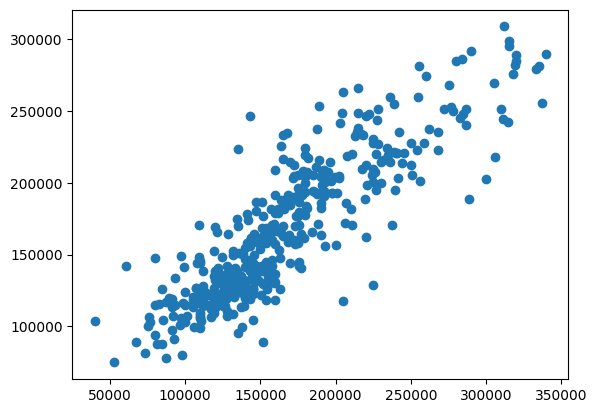

In [38]:
plt.scatter(Y_test,y_pred)
plt.show()
